A. Implement Random Forest Classifier model to predict the safety of the car. Dataset 
link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [1]:
import pandas as pd
df=pd.read_csv("D:/College/BE/CL-1/ML Codes and Datasets/ML/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [2]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
x=df.drop(['class'],axis=1)
y=df['class']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1381, 6), (346, 6))

In [8]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [9]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred[:10]

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc'], dtype=object)

Accuracy: 0.9508670520231214

Classification Report:
               precision    recall  f1-score   support

         acc       0.89      0.95      0.92        77
        good       0.77      0.67      0.71        15
       unacc       1.00      0.99      0.99       237
       vgood       0.71      0.71      0.71        17

    accuracy                           0.95       346
   macro avg       0.84      0.83      0.83       346
weighted avg       0.95      0.95      0.95       346



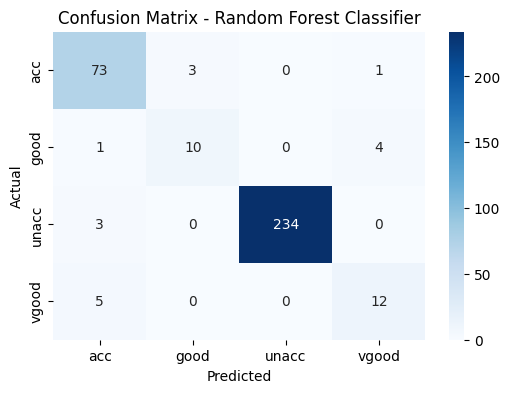

In [12]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
